# Error_log Column
<hr/>

Name | Details | note
:--------:|:--------:|:--------:
EventTime | 事件發生時間 | 
SessionID | SessionID | 
UserID | 玩家代號 | 
ErrorEventID | 事件ID | 
Channel | 下載平台 | 
Country | 國家 | 
LV | 事件前等級 | 
VipLV | 事件前vip等級 | 
UDID | 設備識別ID | 為空或不符合ID格式：Unknown
State | 事件發生場景 | LOADING、LOGIN、LOBBY、RICH_LOBBY、MACHINE、MULTI_PLAYER_GAME
Machine | 事件發生的遊戲 | 不在遊戲中""
TotalBet | 事件發生的總押注 | 不在遊戲中""
FeverState | 事件發生的fever狀態 | NONE、FEVER_RECOVERY、FEVER_RECOVERY_FAIL、不在遊戲中""
PublishVer | 遊戲版本 | 
CurChannel | 事件發生平台 | 代碼同channel
IPCountry | 玩家當時的國家 | 

In [20]:
channel_dict = {
    0: 'Unknown',
    1: 'App Store',
    2: 'Google Play',
    3: 'Facebook',
    4: 'Amazon',
    5: 'Web',
    6: 'Apk',
    7: 'Ham',
    10: 'Huawei',
    11: 'Web_Wing',
    12: 'Google Play VN',
    13: 'Android Wallet',
    14: 'OPPO Over Sea',
    15: 'CLC APK',
    1060: 1060,
    1061: 'lapppay_IOS',
    1062: 'TwPay',
    1064: 'Twpay_IOS',
}

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('./ErrorLog/errorlog0606_0612_edit_ver2.csv')
df.fillna('', inplace = True)   # 空值補 ''

print('Shape of the raw data: ', df.shape)

df.head(10)

Shape of the raw data:  (1005409, 16)


,EventTime,SessionID,UserID,ErrorEventID,Channel,Country,LV,VipLV,UDID,State,Machine,TotalBet,FeverState,PublishVer,CurChannel,IPCountry
0,1591694027,a98efd7aa8e5ca901f689caeee448a05,2.020100e+15,31419999,1,TW,999,8,"""49242BA5-2C92-43A9-A9AA-BB60517A0C2A""",,,,,,,
1,1591753912,c1c93c76a1273b6aa12751e3303e3db1,2.020100e+15,6001,1,CN,33,1,"""8FE31F29-49E0-4B64-BBBC-D9877C292968""",,,,,,,
2,1591753971,c1c93c76a1273b6aa12751e3303e3db1,2.020100e+15,9002,1,CN,33,1,"""8FE31F29-49E0-4B64-BBBC-D9877C292968""",,,,,,,
3,1591768171,"""""",2.020100e+15,2101,1,TW,1,0,"""C855F6DF-DA1A-4CCC-AC12-AA5574509E67""",,,,,,,
4,1591777553,8a6182354acf11f4bd71873be47778b4,2.020100e+15,6001,2,TW,999,8,13085a98dfaa3816,,,,,,,
5,1591711516,3d876fc03ce99a14ed5e71c0d7cb90e5,2.020100e+15,6001,2,TW,397,4,38d547b02d5d3710,,,,,,,
6,1591753763,6bc29aa385300d91541ced10f2061ad7,2.020100e+15,9002,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,
7,1591753737,6bc29aa385300d91541ced10f2061ad7,2.020100e+15,9002,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,
8,1591753711,6bc29aa385300d91541ced10f2061ad7,2.020100e+15,6001,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,
9,1591757540,3d116d8dacadac0094153cbab0bf7ceb,2.020100e+15,2254,1,TW,1000,8,"""3E1FFF13-AE55-4300-B66D-6CC18F673CF4""",,,,,,,


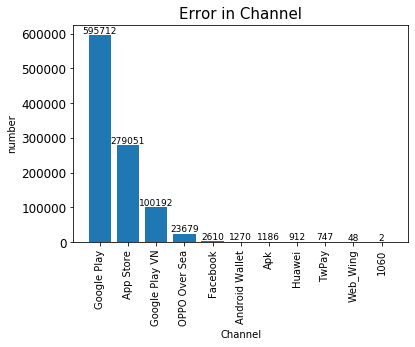

In [22]:
%matplotlib inline

FEATURE = 'Channel'

data = df.groupby(by=FEATURE).count()["Country"].nlargest(20)
# data = data.drop([''])
channel = data.index.tolist()
num = data.tolist()

lenght = np.arange(len(channel)) # colnum 長度
channel = [channel_dict[_cha] for _cha in channel] # mapping編碼

plt.xticks(fontsize=10, rotation="vertical")
plt.yticks(fontsize=12)
plt.rcParams['figure.figsize'] = [20, 20] # 更改圖片大小

plt.title(f'Error in {FEATURE}', fontsize=15)
plt.bar(lenght, num, tick_label=channel) # 繪製柱狀圖
plt.xlabel(f'{FEATURE}')
plt.ylabel('number')
# 標示精確數字
for a,b in zip(lenght, num):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=9)

In [24]:
from sklearn.metrics import mean_absolute_error

def plotMovingAverage(series, window, date_col, plot_intervals=False, scale=1.75, plot_anomalies=False):
    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(10,10))
    plt.title("Moving average\n window size = {}".format(window))
    plt.xticks(np.arange(len(date_col)), date_col, rotation='vertical')
    
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [ ]:
%matplotlib inline
from pandas.core.frame import DataFrame
from datetime import datetime

TW_EventTime = df.loc[df['IPCountry'] == "TW"]['EventTime']

date_time = []
for _time in TW_EventTime:
    dt = datetime.fromtimestamp(_time)
    
    # -----------------------將異常資料去除
    temp_time = str(datetime(dt.year, dt.month, dt.day))
    if temp_time == '2020-06-09 00:00:00':
        continue
    elif temp_time == '2020-06-06 00:00:00': # --------------6/9 補成 6/6
        time = str(datetime(dt.year, dt.month, 9, dt.hour))
        date_time.append(time)
        
    time = str(datetime(dt.year, dt.month, dt.day, dt.hour))
    date_time.append(time)
    
dic = {
    'time': date_time,
    'num': [1 for i in range(len(date_time))]
}
df_data = DataFrame(dic).groupby(by="time").count()
time = df_data.index.tolist()
number = df_data.num.tolist()

_df = pd.DataFrame()
_df['time'] = time
_df['number'] = number

# date_col
date = '2020-06-05'
date_col = []
for i in range(len(time)):
    _date = time[i].split(' ')[0]
    
    if _date != date:
        date_col.append(date)
        date = _date
    else:
        date_col.append('')
        
plt.figure(figsize=(10,10)) # 更改圖片大小

plotMovingAverage(_df['number'], 3, date_col, plot_intervals=True)

###### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = _df['number']
train, test = df.iloc[:130], df.iloc[129:]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=6).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(10,10)) # 更改圖片大小

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [52]:
import statsmodels.api as sm
import itertools
# Grid Search
p = d = q = range(0,3)                     # p, d, and q can be either 0, 1, or 2
pdq = list(itertools.product(p,d,q))       # gets all possible combinations of p, d, and q 
p2 = d2 = q2 = range(0, 2)                 # second set of p's, d's, and q's
pdq2 = list(itertools.product(p2,d2,q2))   # simular too code above but for seasonal parameters
s = 12                                     # periodicty of the seasonal cycle
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []

# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(_df['number'],
                                              order=combination,
                                              seasonal_order=seasonal_combination,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            model = model.fit()
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)
            
        except:
            continue
            
best_aic = min(aics)

C:\Users\HP AY111TX\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP AY111TX\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP AY111TX\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP AY111TX\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP AY111TX\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

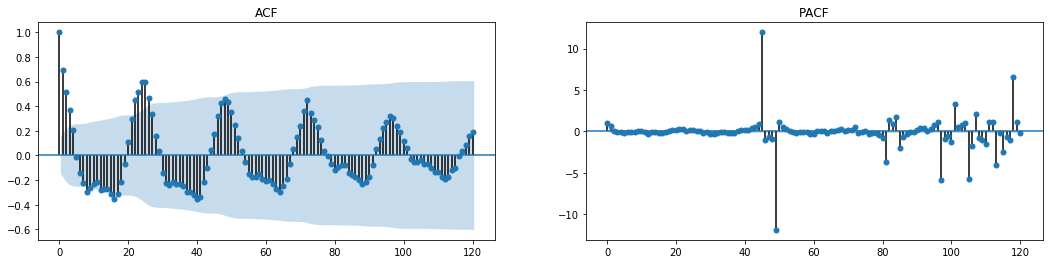

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def draw_acf_pacf(ts, lags=52):
    f = plt.figure(facecolor='white', figsize=(18,4))
    ax1 = f.add_subplot(121)
    plot_acf(ts, lags=lags, ax=ax1, title='ACF')
    ax2 = f.add_subplot(122)
    plot_pacf(ts, lags=lags, ax=ax2, title='PACF')
    plt.show
draw_acf_pacf(_df['number'], lags=120)

                                 Statespace Model Results                                 
Dep. Variable:                             number   No. Observations:                  169
Model:             SARIMAX(1, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -720.762
Date:                            Mon, 05 Oct 2020   AIC                           1453.524
Time:                                    20:07:44   BIC                           1471.216
Sample:                                         0   HQIC                          1460.713
                                            - 169                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7377      0.053     13.838      0.000       0.633       0.842
ma.L1         -1.3443    115.530   

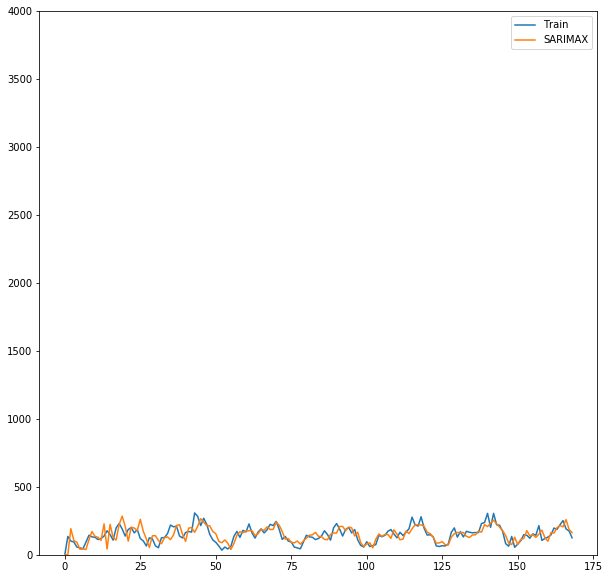

In [54]:
# Modeling and forcasting
model = sm.tsa.statespace.SARIMAX(_df['number'],
                                  order=combs[best_aic][0],
                                  seasonal_order=combs[best_aic][1],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
model_fit = model.fit()
print(model_fit.summary())
pred = model_fit.predict(start=_df['number'].index[0], end=_df['number'].index[-1])

plt.figure(figsize=(10,10)) # 更改圖片大小

axes = plt.gca()
axes.set_ylim([0, 4000])
plt.plot(_df['number'].index, _df['number'], label='Train')
plt.plot(pred.index, pred, label='SARIMAX')
plt.legend(loc='best')

In [ ]:
State_Login = df.loc[df['State'] == "LOGIN"]['EventTime']

date_time = []
for _time in State_Login:
    dt = datetime.fromtimestamp(_time)
    time = str(datetime(dt.year, dt.month, dt.day))
    date_time.append(time)

dic = {
    'time': date_time,
    'num': [1 for i in range(len(date_time))]
}
df_time = DataFrame(dic)

df_data = df_time.groupby(by="time").count()
time = df_data.index.tolist()
number = df_data.num.tolist()

x = np.arange(len(time))
plt.bar(x, number, tick_label=time)
plt.title('error (TW)')
plt.xlabel('time')
plt.ylabel('number')
plt.show()